# Interpreting Large Language Models with Soft Entropy

There are major questions about multi-linguality from both a cognitive perspective and a typological perspective. An advantage of working with large language models is that they allow you to look at what happens inside the model on a representational level as it processes a sentence. We've prepared a number of datasets and models for you to look at, all listed in the ```1_resources.ipynb``` notebook. A description of the measures can be found in the file ```3_entropy_explanation.ipynb``` or in [this paper](https://arxiv.org/pdf/2406.02449).



In [1]:
# to relate with Wasserstein metric and Manifold capacity

In [2]:
#We import a class for analysing BERT models and an entropy estimator
from h import BERTAnalyser, Estimator

In [3]:
languages = ['french', 'german', 'finnish', 'romanian', 'danish', 'spanish']

In [4]:
save_path = 'results' #path where JSON file with results should be written
model_id = 'distilbert/distilbert-base-multilingual-cased' #hugging face model id
task_repo, subtask_name = 'hcoxec/french_german_mix', None #hugging face model repo and substask names
n_batches, batch_size = 10, 256 #how many batches of data to analyse, and sentences per batch
device = 'cpu' #torch device to load model into usually cpu or cuda:0
cache_dir = 'model_cache' #path to directory where model files should be saved

In [5]:
#these additional logs will also be written to the results file, to help
#keep track of variables later
additional_logs = {
    "model" : 'm_bert',
    "n_examples" : n_batches*batch_size,
}

In [6]:
h_estimator = Estimator() #instantiates and Entropy estimator
analyser = BERTAnalyser( #intantiants an analyser and loads the bert model into memory
    device=device,
    h_estimator=h_estimator, 
    model_id=model_id, 
    results_file_name=save_path,
    cache_dir=cache_dir
)
analyser.get_dataset(task_repo, subtask_name) #downloads the dataset
train_loader = analyser.get_dataloader(bs=batch_size) #packages the dataset into batches


In [7]:
h_estimator.reset() #clears the probability table from the estimator to start a new analysis
results_dict, results_df  = analyser.online_estimation( #runs online entropy estimation for the number of batches specified
    train_loader, 
    max_batches=n_batches, 
    additional_logs= additional_logs,
    label_types=['language', 'token','bigram','trigram']
)
results_df

Encoding | hcoxec/french_german_mix:   0%|          | 0/10 [00:00<?, ?it/s]

layer 0


Encoding | hcoxec/french_german_mix:   0%|          | 0/10 [00:00<?, ?it/s]

layer 1


Encoding | hcoxec/french_german_mix:   0%|          | 0/10 [00:00<?, ?it/s]

layer 2


Encoding | hcoxec/french_german_mix:   0%|          | 0/10 [00:00<?, ?it/s]

layer 3


Encoding | hcoxec/french_german_mix:   0%|          | 0/10 [00:00<?, ?it/s]

layer 4


Encoding | hcoxec/french_german_mix:   0%|          | 0/10 [00:00<?, ?it/s]

layer 5


[          variation  residual  disentanglement  regularity     label
 overall    0.973033  0.127650         0.000000    0.000000   overall
 language   0.963970  0.009314         0.028131    0.009063  language
 token      0.145849  0.840795         0.566727    0.827184     token
 bigram     0.128134  0.018206         0.211448    0.844899    bigram
 trigram    0.124208  0.004035         0.247015    0.848825   trigram,
           variation  residual  disentanglement  regularity     label
 overall    0.949095  0.178605         0.000000    0.000000   overall
 language   0.939550  0.010056         0.043910    0.009544  language
 token      0.231989  0.745512         0.527753    0.717106     token
 bigram     0.187767  0.046594         0.233988    0.761327    bigram
 trigram    0.169513  0.019233         0.268378    0.779581   trigram,
           variation  residual  disentanglement  regularity     label
 overall    0.940071  0.227018         0.000000    0.000000   overall
 language   0.9309

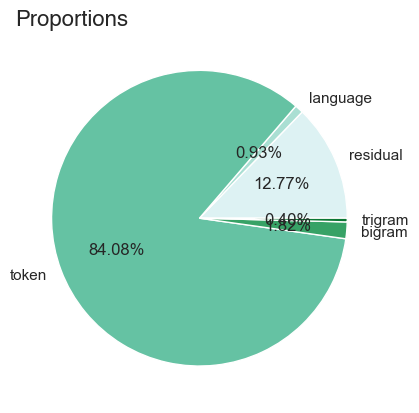

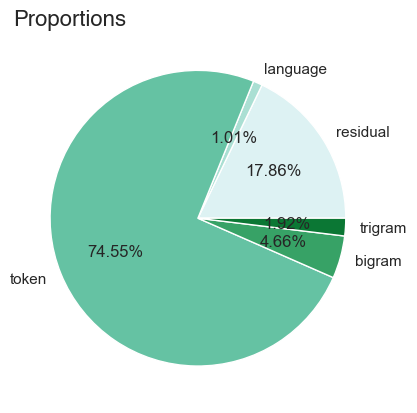

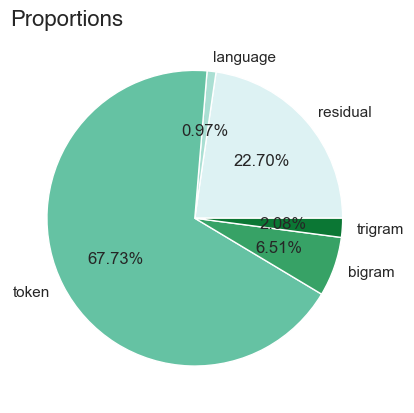

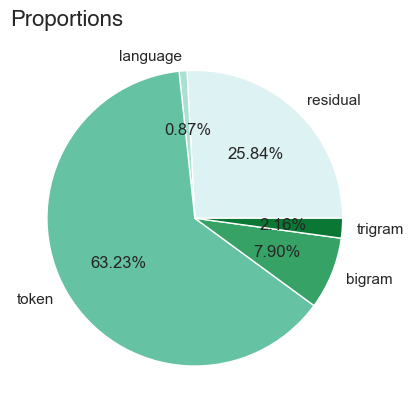

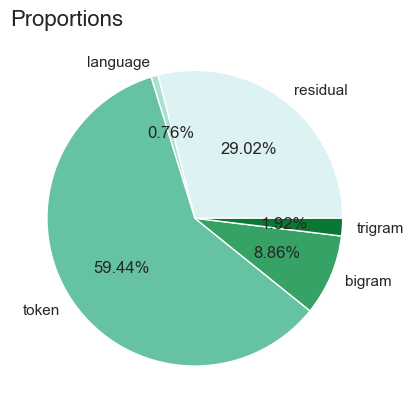

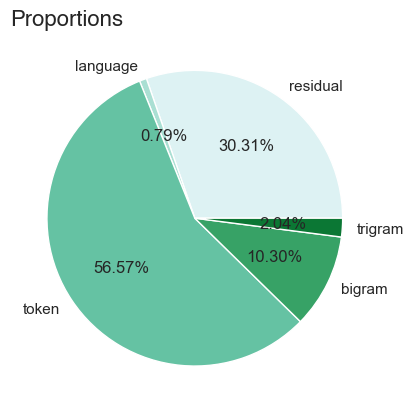

In [10]:
import matplotlib.pyplot as plt
for i in range(len(results_df)):
    analyser.plot_residual(results_df[i]) #builds a pie chart of the residual
    plt.show()

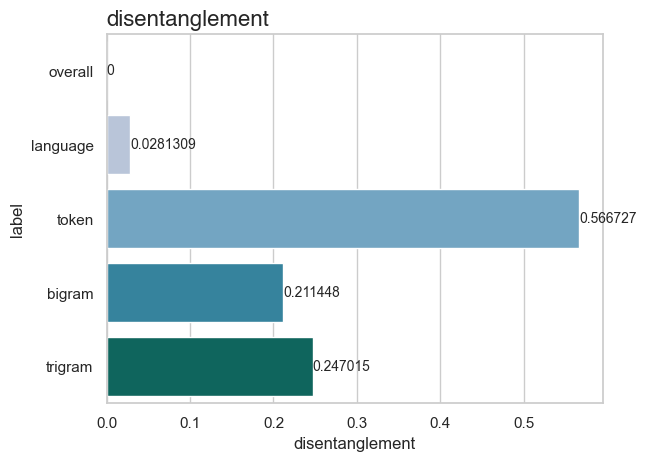

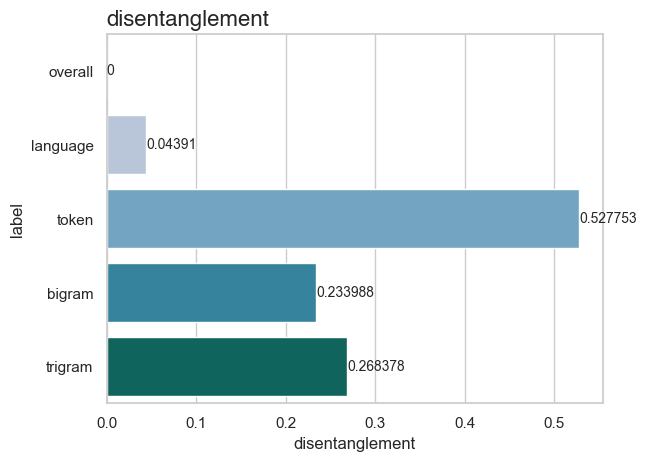

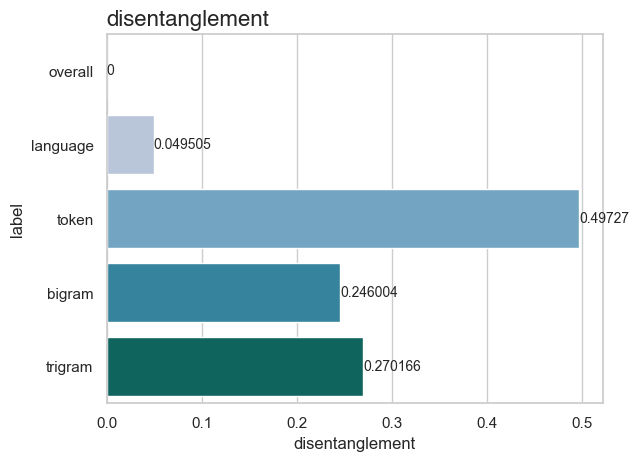

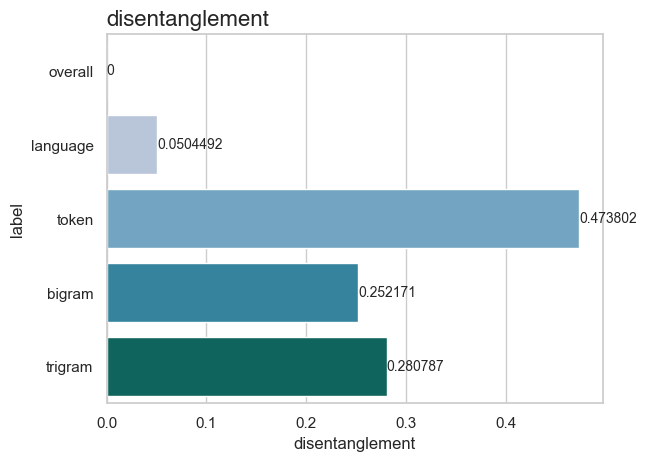

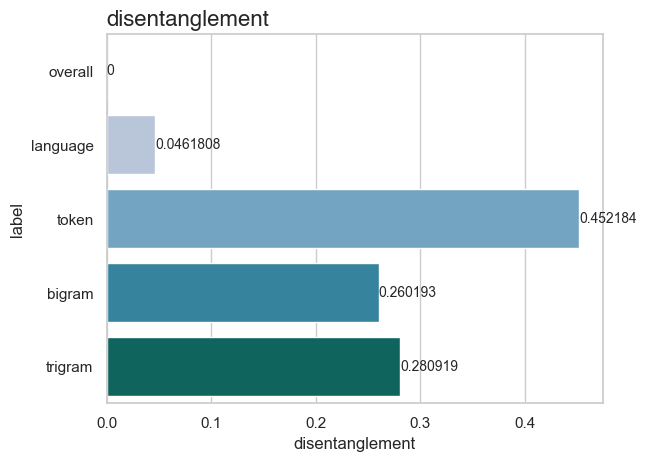

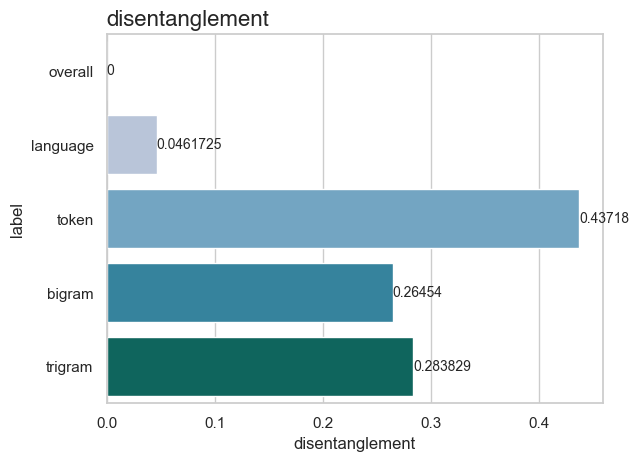

In [15]:
for i in range(len(results_df)):
    analyser.plot(results_df[i], measure='disentanglement') #generates a bar plot of any measure
    plt.show()

In [ ]:
import pandas as pd

#loads all saved results into a dataframe for analysis
df = pd.read_json('results.json', lines=True)
